POISSON'S EQUATION USING FINITE DIFFERENCE METHOD


In [1]:
import numpy as np
import matplotlib.pyplot as plt

DEFINING ALL PARAMETERS OF INTEREST AND FUNCTION FOR CALCULATING POTENTIAL(PHI)

In [2]:
def solve_poisson(nx, ny, rho, tol=1e-5, max_iter=5000):
    h = 1.0 / (nx - 1)  # Grid spacing
    phi = np.zeros((nx, ny))  # Initialize potential field
    
    for iteration in range(max_iter):
        phi_old = phi.copy()
        
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
                
        # Convergence check
        error = np.linalg.norm(phi - phi_old, ord=np.inf)
        if error < tol:
            print(f'Converged in {iteration} iterations.')
            break
    return phi

DIFINING GRID SIZE

In [4]:
nx, ny = 50, 50  # Grid points
rho = np.zeros((nx, ny))
rho[nx//2, ny//2] = 1  # Source term (charge/mass at center)

SOLVING FOR POISSON'S EQUATION

In [5]:
phi = solve_poisson(nx, ny, rho)

Converged in 68 iterations.


PLOTTING RESULTS

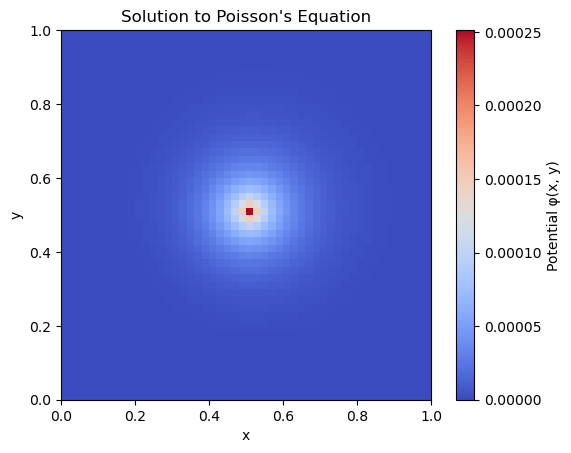

In [6]:
plt.imshow(phi, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm')
plt.colorbar(label='Potential φ(x, y)')
plt.title("Solution to Poisson's Equation")
plt.xlabel('x')
plt.ylabel('y')
plt.show()